In [1]:
import math  # Mathematical functions
import numpy as np  # Fundamental package for scientific computing with Python
import pandas as pd  # For analysing and manipulating data
from datetime import date, timedelta  # Date Functions
# Adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt  # For visualization
# import matplotlib.dates as mdates  # Formatting dates
# For measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler  # to normalize the price data
# Deep learning library, used for neural networks
from keras.models import Sequential
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf




In [2]:
# start = '2010-01-01'
# end = '2019-12-31'
today = date.today()
end = today.strftime("%Y-%m-%d")
start = '2014-01-01'
# df = get_data("amzn", start,end)
df = yf.download("AAPL", start, end)
print(df.shape)
df.head()

[*********************100%***********************]  1 of 1 completed
(2375, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364965,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983522,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.580002,121946500
2023-06-06,179.970001,180.119995,177.429993,179.210007,179.210007,64848400
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50130500


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.364965,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.983522,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.076143,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.954014,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.061384,258529600


In [5]:
df = df.drop(['Date', 'Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


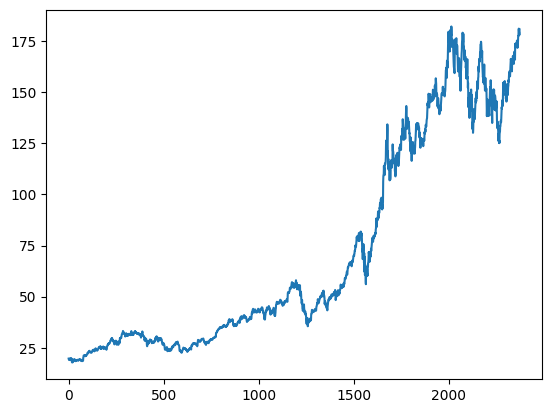

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600
...,...,...,...,...,...
2370,181.029999,181.779999,179.259995,180.949997,61945900
2371,182.630005,184.949997,178.039993,179.580002,121946500
2372,179.970001,180.119995,177.429993,179.210007,64848400
2373,178.440002,181.210007,177.320007,177.820007,61944600


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2370    158.0656
2371    158.5541
2372    159.0113
2373    159.4554
2374    159.9135
Name: Close, Length: 2375, dtype: float64

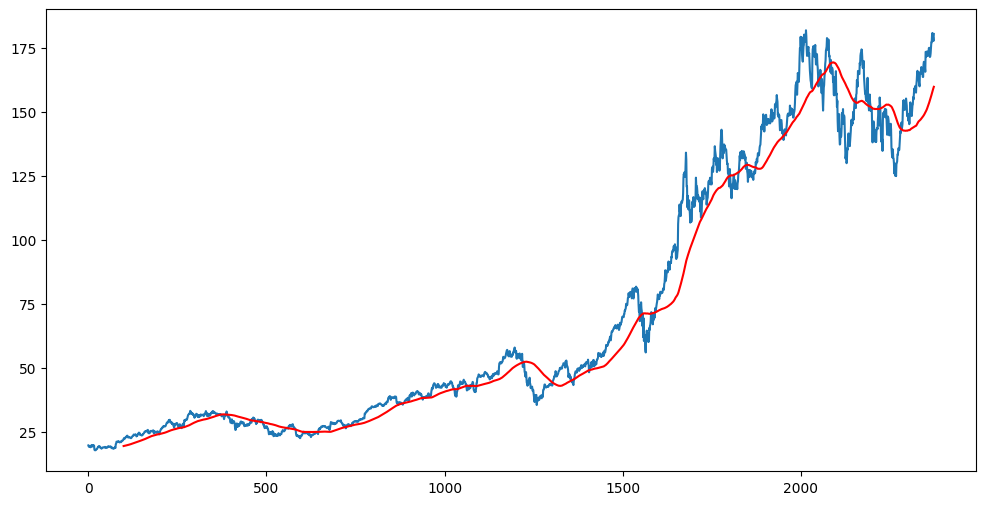

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2370    152.46475
2371    152.48990
2372    152.51520
2373    152.54670
2374    152.61170
Name: Close, Length: 2375, dtype: float64

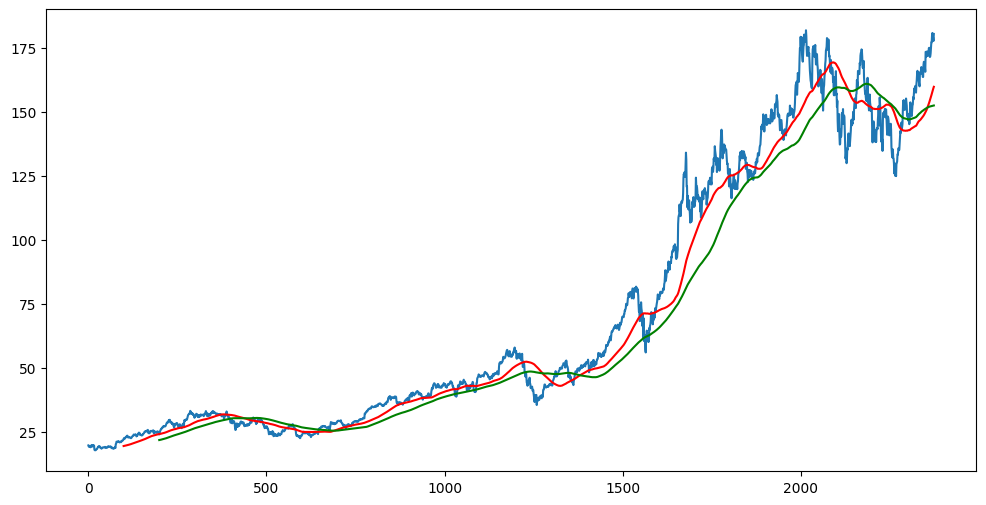

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2375, 5)

In [13]:
# Splitting data into training set and testing set

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1662, 1)
(713, 1)


In [14]:
data_training.head()

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286


In [15]:
data_testing.head()

,Close
1662,112.727501
1663,109.375000
1664,113.010002
1665,115.010002
1666,114.907501


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01983648],
       [0.0153189 ],
       [0.01641576],
       ...,
       [0.9600222 ],
       [1.        ],
       [0.97095367]])

In [17]:
data_training_array.shape

(1662, 1)

In [18]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)



In [19]:
x_train.shape

(1562, 100, 1)

In [20]:
#  ML :- LSTM Model

model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))  #Only one unit using that is close and it conects all above layers




In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50) 

Epoch 1/50
49/49 [==============================] - 27s 373ms/step - loss: 0.0201
Epoch 2/50
49/49 [==============================] - 18s 358ms/step - loss: 0.0038
Epoch 3/50
49/49 [==============================] - 17s 343ms/step - loss: 0.0038
Epoch 4/50
49/49 [==============================] - 17s 351ms/step - loss: 0.0037
Epoch 5/50
49/49 [==============================] - 17s 355ms/step - loss: 0.0029
Epoch 6/50
49/49 [==============================] - 17s 351ms/step - loss: 0.0028
Epoch 7/50
49/49 [==============================] - 16s 332ms/step - loss: 0.0028
Epoch 8/50
49/49 [==============================] - 17s 346ms/step - loss: 0.0029
Epoch 9/50
49/49 [==============================] - 17s 352ms/step - loss: 0.0024
Epoch 10/50
49/49 [==============================] - 17s 355ms/step - loss: 0.0025
Epoch 11/50
49/49 [==============================] - 17s 345ms/step - loss: 0.0029
Epoch 12/50
49/49 [==============================] - 17s 354ms/step - loss: 0.0028
Epoch 13/50
4

In [23]:
model.save('keras_model.h5')

OSError: [Errno 9] Unable to create file (file write failed: time = Fri Jun  9 13:58:11 2023
, filename = 'keras_model.h5', file descriptor = 4, errno = 9, error message = 'Bad file descriptor', buf = 00000278D537CAF8, total write size = 96, bytes this sub-write = 96, bytes actually written = 18446744073709551615, offset = 0)

In [ ]:
data_testing.head()

: 

In [ ]:
data_training.tail(100)   #this are the values that append in data testing set

: 

In [ ]:
past_100_days = data_training.tail(100)


: 

In [ ]:
# final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


: 

In [ ]:
final_df.head()  #Testing data

: 

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

: 

In [ ]:
input_data.shape

: 

In [ ]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    

: 

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

: 

In [ ]:
# Making Prediction 

y_predicted = model.predict(x_test)
y_predicted.shape

: 

In [ ]:
y_test

: 

In [ ]:
y_predicted

: 

In [ ]:
# scaler.scale_
scaling_factors = scaler.scale_
scale_factor = 1 / scaling_factors[0]


: 

In [ ]:
# scale_factor = 1/0.0045286
scale_factor = 1 / scaling_factors[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


: 

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


: 